# A genetic algorithm for optimizing traveling salesman problem

https://github.com/luthfishahab/geneticalgorithm

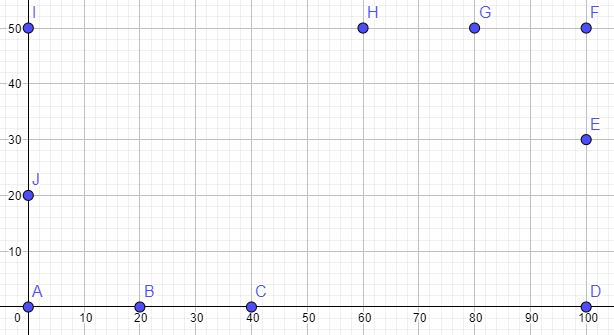

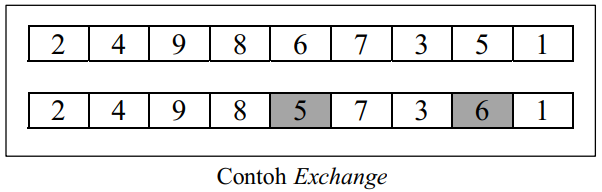

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20])

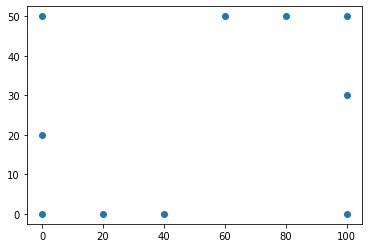

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 20

# maximum generation
N = 100

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30],
       [ 20,  28,  44, 101, 100, 104,  85,  67,  30,   0]])

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
def randomSelection(m):
    position = np.random.permutation(m)
    
    return position[0], position[1]

In [9]:
def crossover(pop):
    popc = pop.copy()
    
    for i in range(n):
        a, b = randomSelection(m)
        x1 = min(a,b)
        x2 = max(a,b)

        temp = list(pop.loc[a][x1:x2+1])
        temp += [val for val in pop.loc[b] if val not in temp]
        
        popc.loc[i] = temp
    
    return popc

In [10]:
def mutation(popc):
    popm = popc.copy()
    
    for i in range(n):
        a, b = randomSelection(m)
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Solusi pada populasi awal
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  3  8  4  6  5  2  9  0  1      550


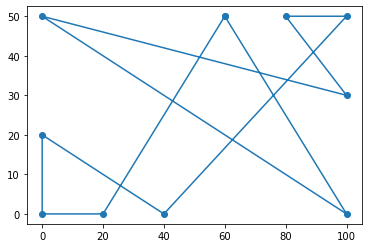


Solusi terbaik pada populasi generasi ke-1
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  9  0  2  1  8  4  3      421


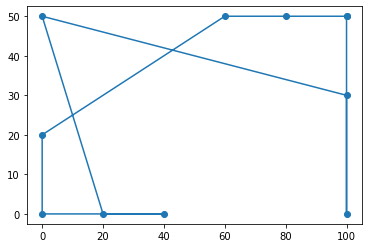


Solusi terbaik pada populasi generasi ke-2
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  9  0  2  1  8  4  3      421


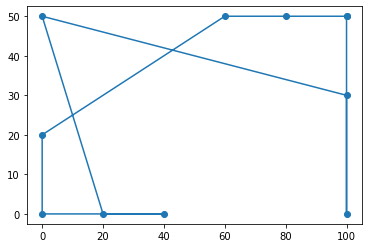


Solusi terbaik pada populasi generasi ke-3
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  0  2  1  9  4  3      418


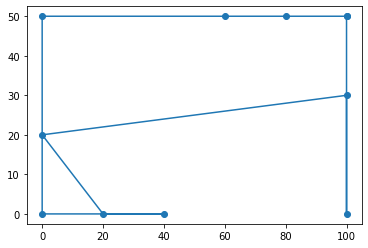


Solusi terbaik pada populasi generasi ke-4
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  0  2  1  9  4  3      418


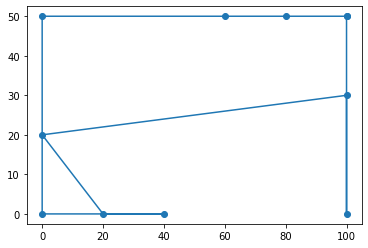


Solusi terbaik pada populasi generasi ke-5
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  0  2  1  9  3  4      389


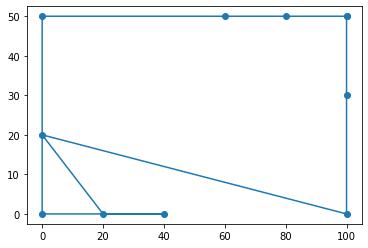


Solusi terbaik pada populasi generasi ke-6
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  0  2  1  9  3  4      389


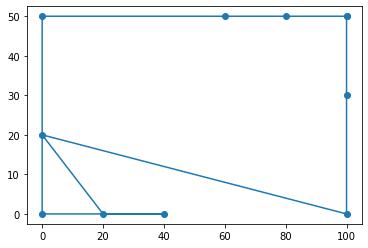


Solusi terbaik pada populasi generasi ke-7
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  7  6  8  9  0  2  1  3  4      380


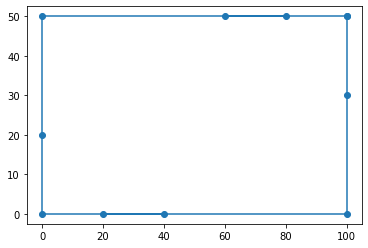


Solusi terbaik pada populasi generasi ke-8
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  1  8  9  0  2  3  4      357


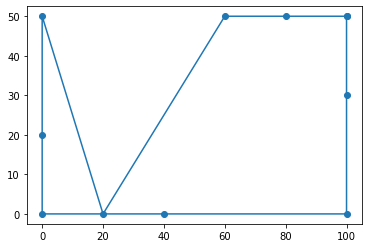


Solusi terbaik pada populasi generasi ke-9
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  0  2  1  3  4      340


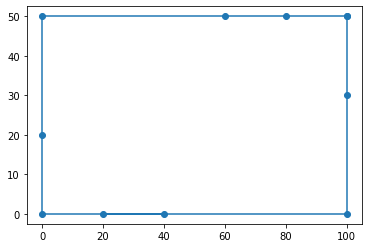


Solusi terbaik pada populasi generasi ke-10
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  0  2  1  3  4      340


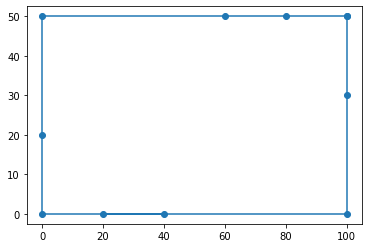


Solusi terbaik pada populasi generasi ke-11
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  1  0  2  3  4      328


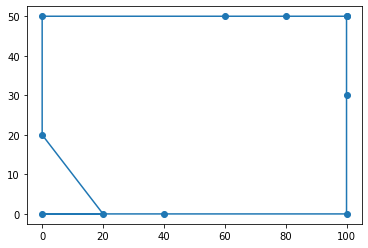


Solusi terbaik pada populasi generasi ke-12
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  1  0  2  3  4      328


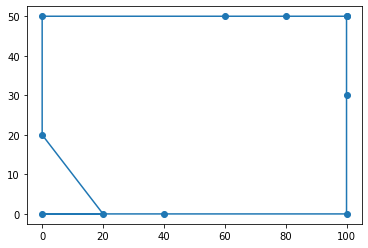


Solusi terbaik pada populasi generasi ke-13
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  1  0  2  3  4      328


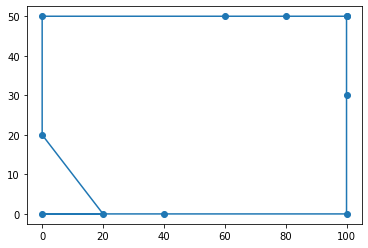


Solusi terbaik pada populasi generasi ke-14
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  1  0  2  3  4      328


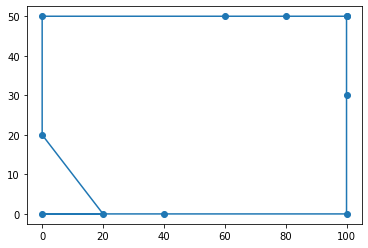


Solusi terbaik pada populasi generasi ke-15
   0  1  2  3  4  5  6  7  8  9  fitness
0  5  6  7  8  9  1  0  2  3  4      328


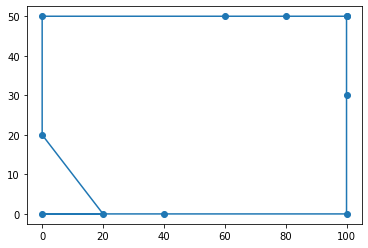


Solusi terbaik pada populasi generasi ke-16
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


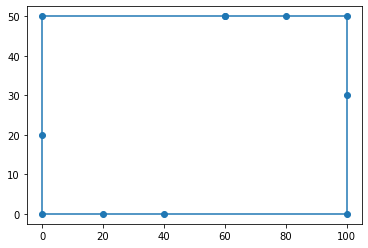


Solusi terbaik pada populasi generasi ke-17
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


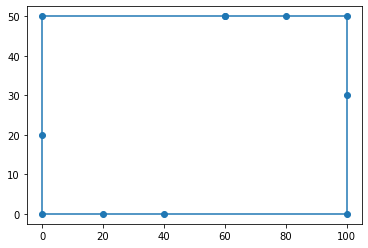


Solusi terbaik pada populasi generasi ke-18
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


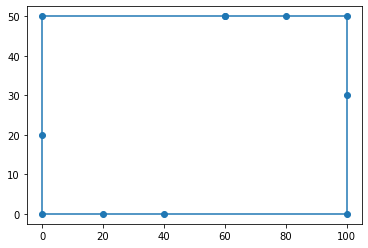


Solusi terbaik pada populasi generasi ke-19
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


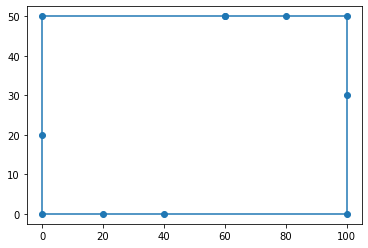


Solusi terbaik pada populasi generasi ke-20
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


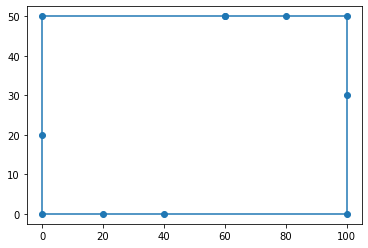


Solusi terbaik pada populasi generasi ke-21
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


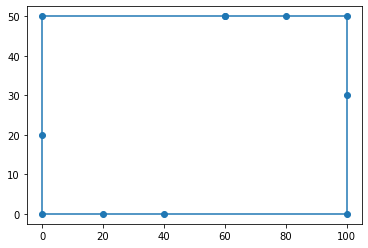


Solusi terbaik pada populasi generasi ke-22
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


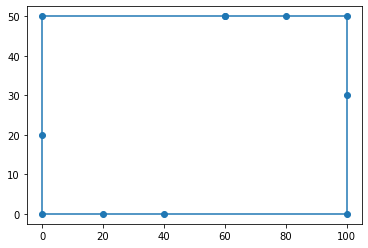


Solusi terbaik pada populasi generasi ke-23
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


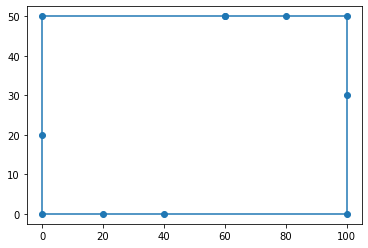


Solusi terbaik pada populasi generasi ke-24
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


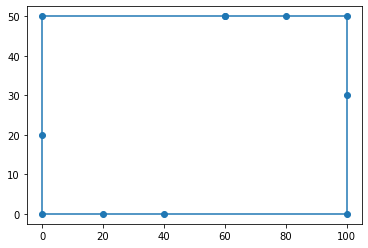


Solusi terbaik pada populasi generasi ke-25
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


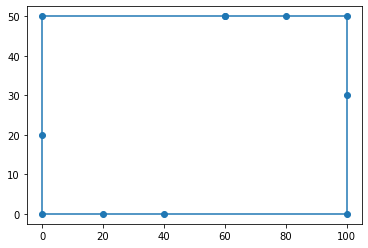


Solusi terbaik pada populasi generasi ke-26
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


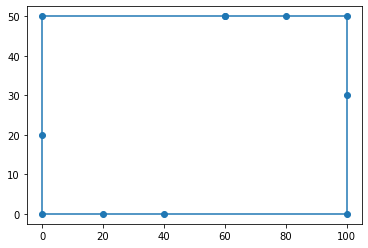


Solusi terbaik pada populasi generasi ke-27
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


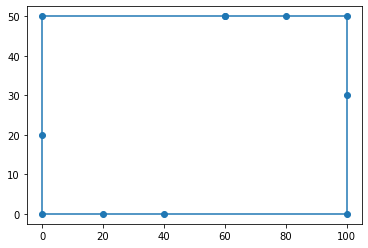


Solusi terbaik pada populasi generasi ke-28
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


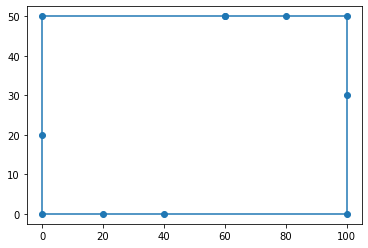


Solusi terbaik pada populasi generasi ke-29
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


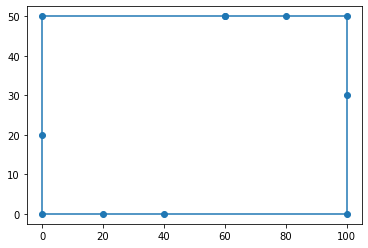


Solusi terbaik pada populasi generasi ke-30
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


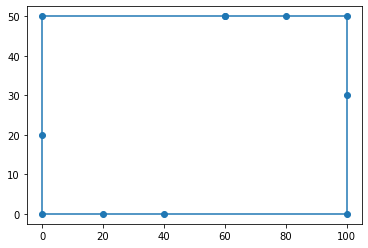


Solusi terbaik pada populasi generasi ke-31
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


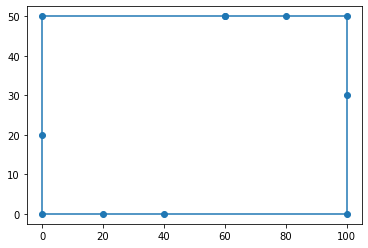


Solusi terbaik pada populasi generasi ke-32
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


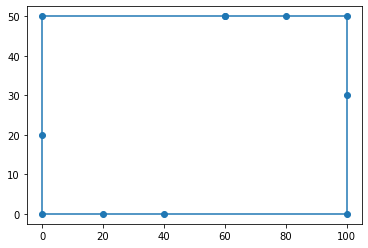


Solusi terbaik pada populasi generasi ke-33
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


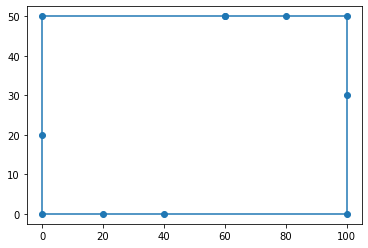


Solusi terbaik pada populasi generasi ke-34
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


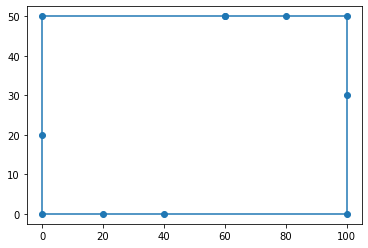


Solusi terbaik pada populasi generasi ke-35
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


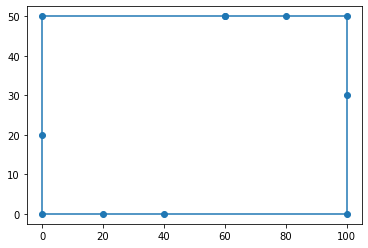


Solusi terbaik pada populasi generasi ke-36
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


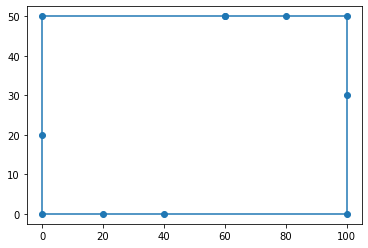


Solusi terbaik pada populasi generasi ke-37
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


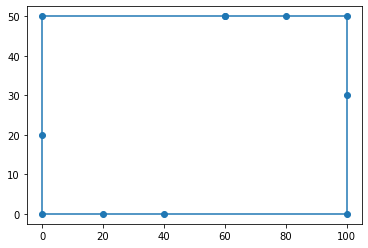


Solusi terbaik pada populasi generasi ke-38
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


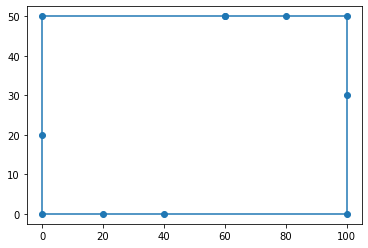


Solusi terbaik pada populasi generasi ke-39
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


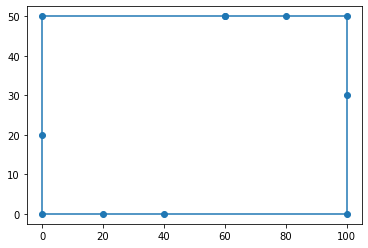


Solusi terbaik pada populasi generasi ke-40
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


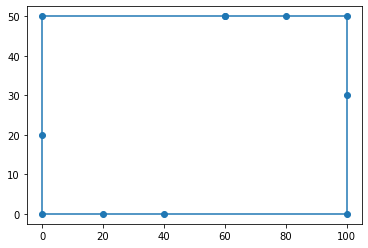


Solusi terbaik pada populasi generasi ke-41
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


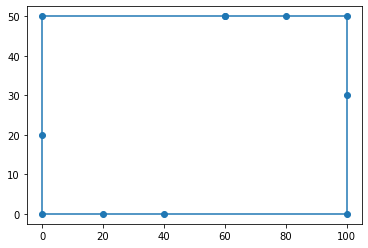


Solusi terbaik pada populasi generasi ke-42
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


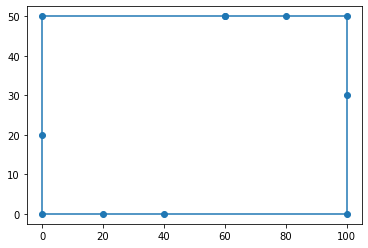


Solusi terbaik pada populasi generasi ke-43
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


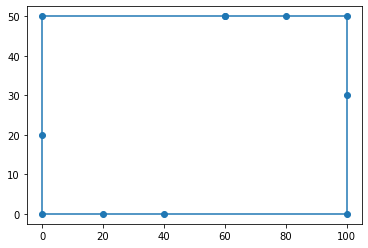


Solusi terbaik pada populasi generasi ke-44
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


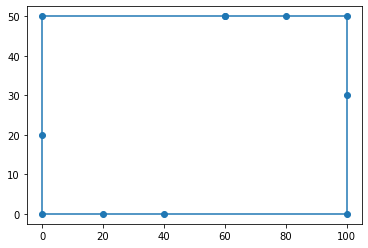


Solusi terbaik pada populasi generasi ke-45
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


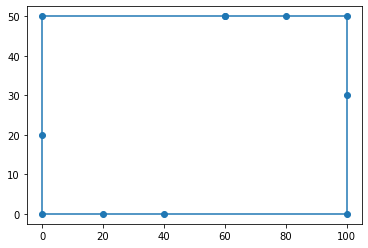


Solusi terbaik pada populasi generasi ke-46
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


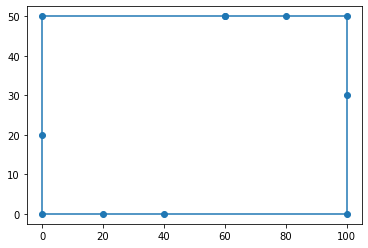


Solusi terbaik pada populasi generasi ke-47
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


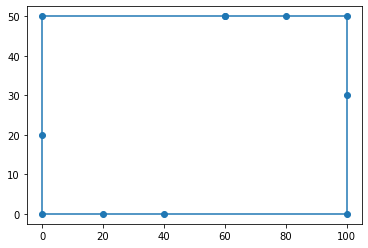


Solusi terbaik pada populasi generasi ke-48
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


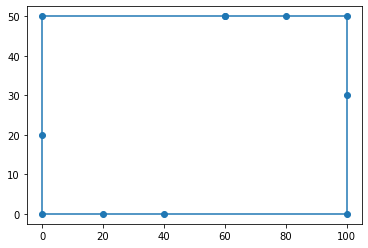


Solusi terbaik pada populasi generasi ke-49
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


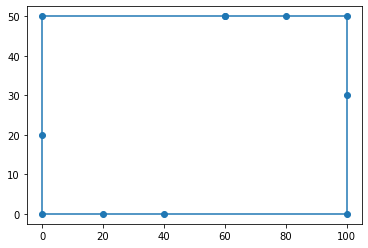


Solusi terbaik pada populasi generasi ke-50
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


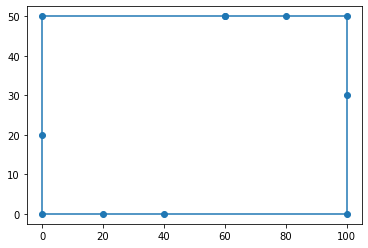


Solusi terbaik pada populasi generasi ke-51
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


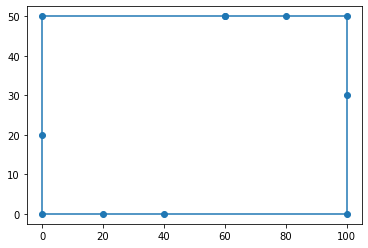


Solusi terbaik pada populasi generasi ke-52
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


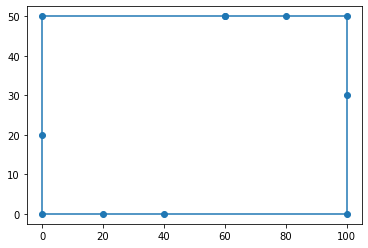


Solusi terbaik pada populasi generasi ke-53
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


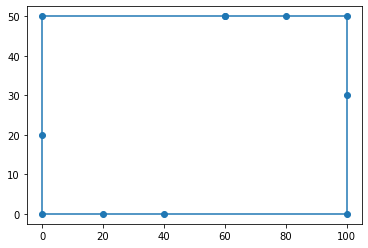


Solusi terbaik pada populasi generasi ke-54
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


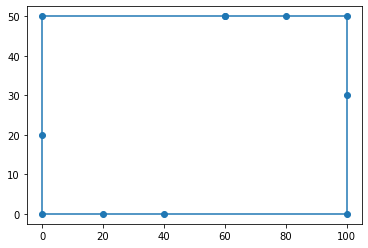


Solusi terbaik pada populasi generasi ke-55
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


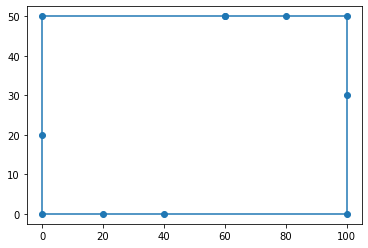


Solusi terbaik pada populasi generasi ke-56
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


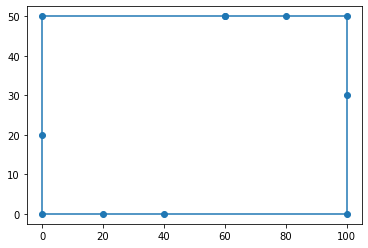


Solusi terbaik pada populasi generasi ke-57
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


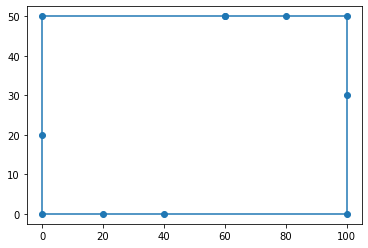


Solusi terbaik pada populasi generasi ke-58
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


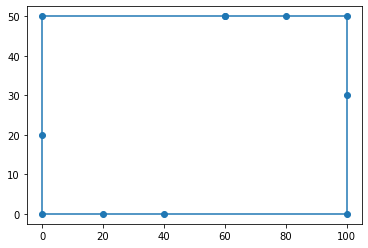


Solusi terbaik pada populasi generasi ke-59
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


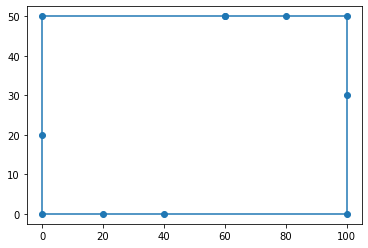


Solusi terbaik pada populasi generasi ke-60
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


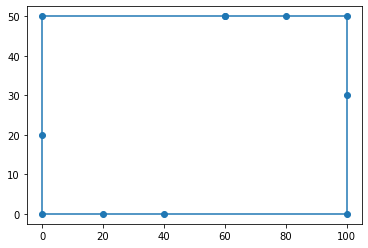


Solusi terbaik pada populasi generasi ke-61
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


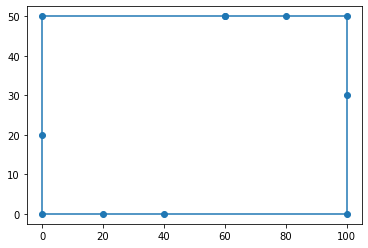


Solusi terbaik pada populasi generasi ke-62
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


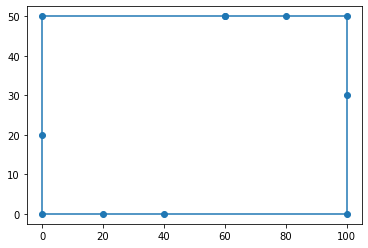


Solusi terbaik pada populasi generasi ke-63
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


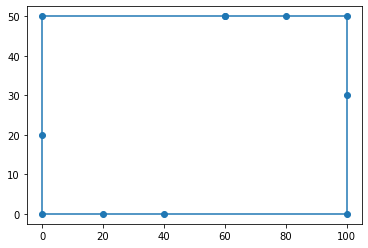


Solusi terbaik pada populasi generasi ke-64
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


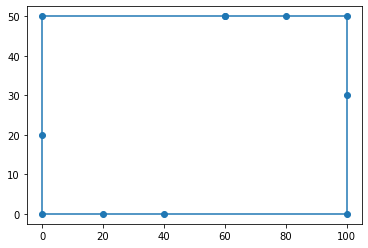


Solusi terbaik pada populasi generasi ke-65
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


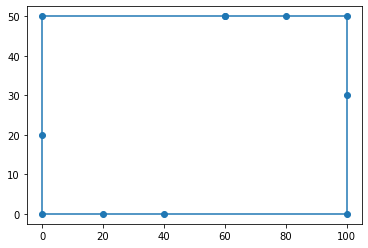


Solusi terbaik pada populasi generasi ke-66
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


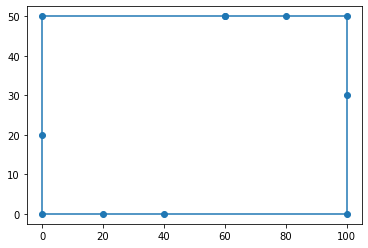


Solusi terbaik pada populasi generasi ke-67
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


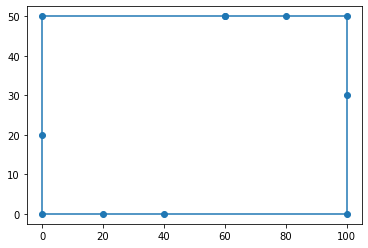


Solusi terbaik pada populasi generasi ke-68
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


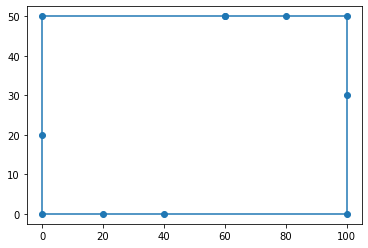


Solusi terbaik pada populasi generasi ke-69
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


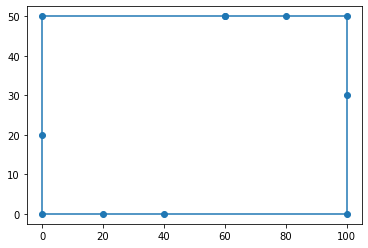


Solusi terbaik pada populasi generasi ke-70
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


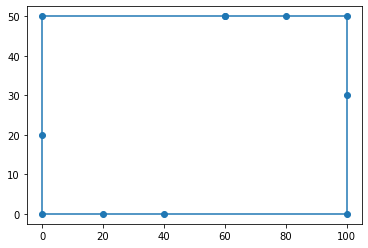


Solusi terbaik pada populasi generasi ke-71
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


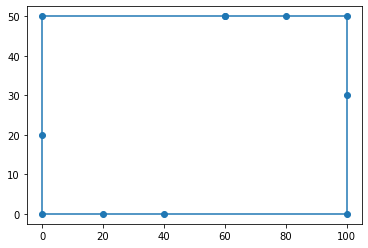


Solusi terbaik pada populasi generasi ke-72
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


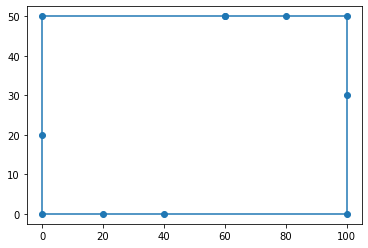


Solusi terbaik pada populasi generasi ke-73
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


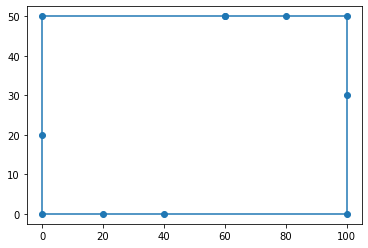


Solusi terbaik pada populasi generasi ke-74
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


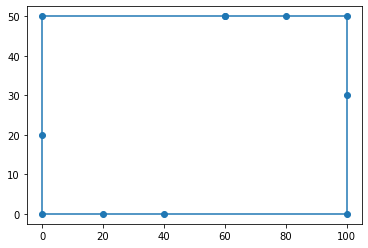


Solusi terbaik pada populasi generasi ke-75
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


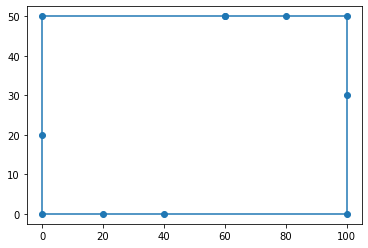


Solusi terbaik pada populasi generasi ke-76
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


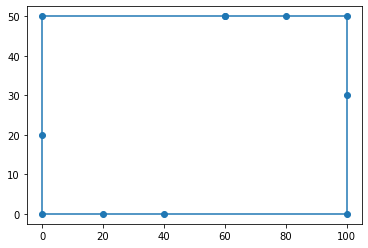


Solusi terbaik pada populasi generasi ke-77
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


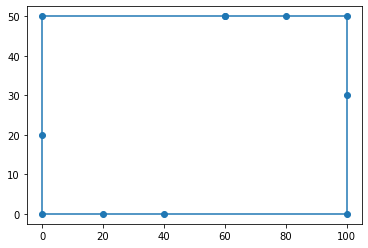


Solusi terbaik pada populasi generasi ke-78
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


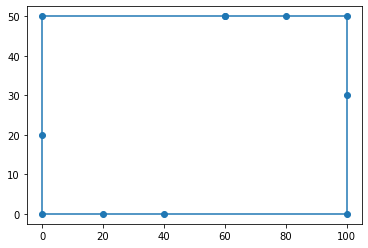


Solusi terbaik pada populasi generasi ke-79
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


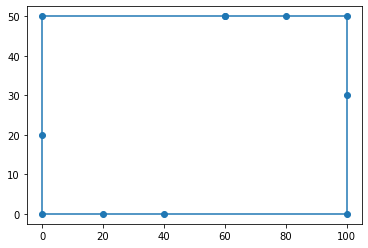


Solusi terbaik pada populasi generasi ke-80
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


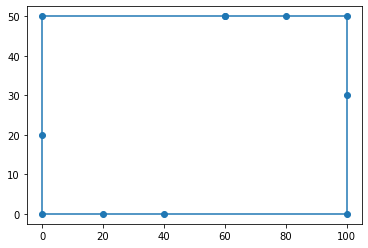


Solusi terbaik pada populasi generasi ke-81
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


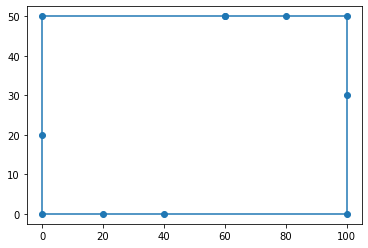


Solusi terbaik pada populasi generasi ke-82
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


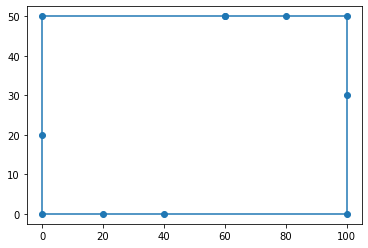


Solusi terbaik pada populasi generasi ke-83
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


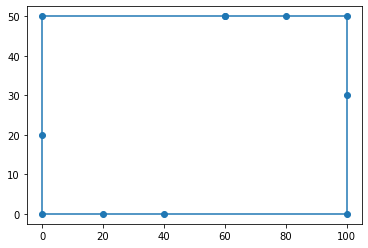


Solusi terbaik pada populasi generasi ke-84
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


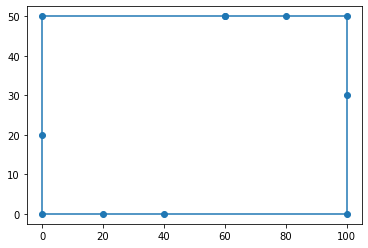


Solusi terbaik pada populasi generasi ke-85
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


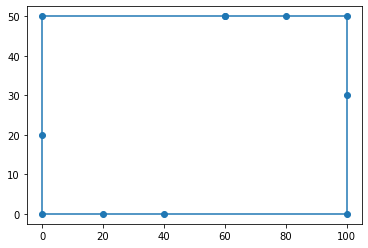


Solusi terbaik pada populasi generasi ke-86
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


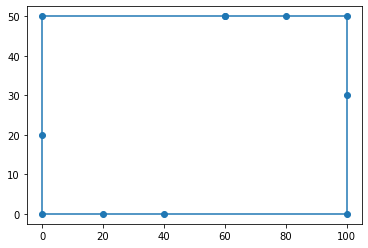


Solusi terbaik pada populasi generasi ke-87
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


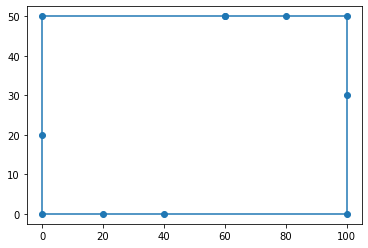


Solusi terbaik pada populasi generasi ke-88
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


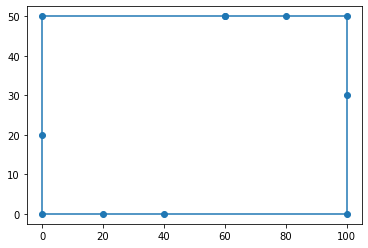


Solusi terbaik pada populasi generasi ke-89
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


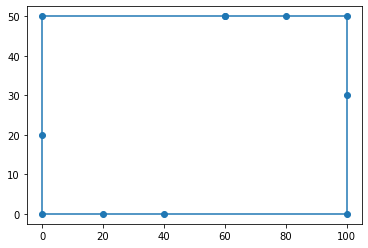


Solusi terbaik pada populasi generasi ke-90
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


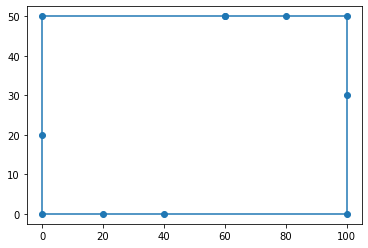


Solusi terbaik pada populasi generasi ke-91
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


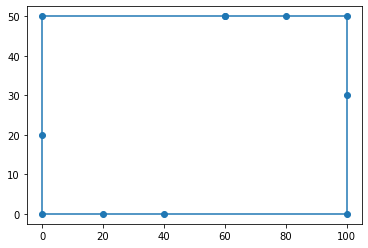


Solusi terbaik pada populasi generasi ke-92
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


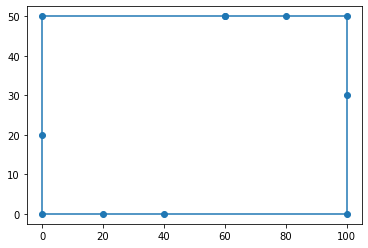


Solusi terbaik pada populasi generasi ke-93
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


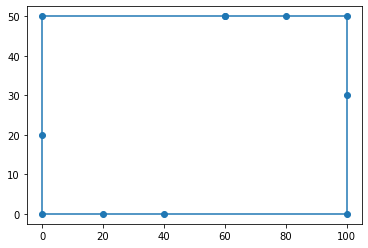


Solusi terbaik pada populasi generasi ke-94
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


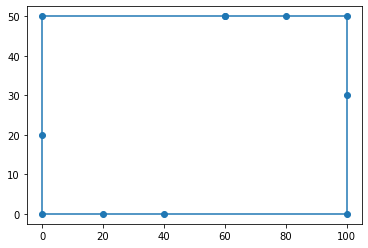


Solusi terbaik pada populasi generasi ke-95
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


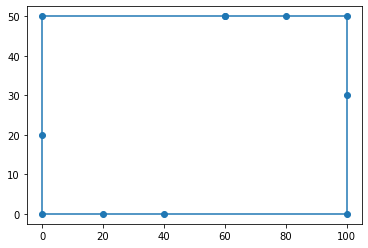


Solusi terbaik pada populasi generasi ke-96
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


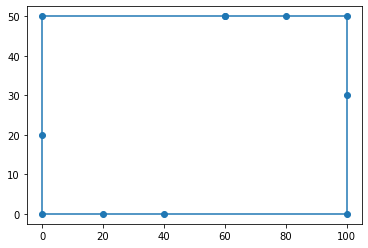


Solusi terbaik pada populasi generasi ke-97
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


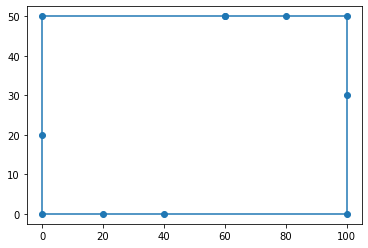


Solusi terbaik pada populasi generasi ke-98
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


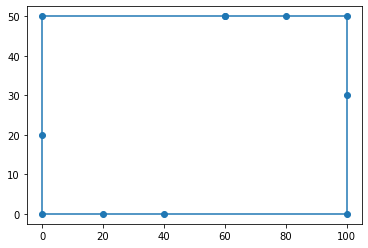


Solusi terbaik pada populasi generasi ke-99
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


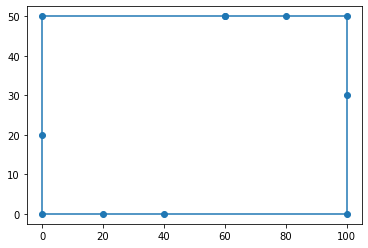


Solusi terbaik pada populasi generasi ke-100
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


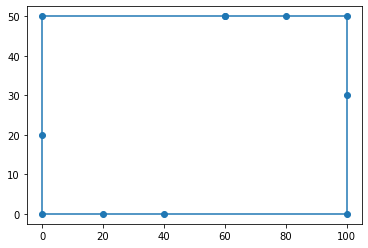


Solusi terbaik pada populasi akhir
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  8  9  0  1  2  3  4  5  6      300


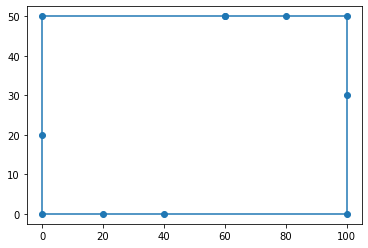

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print('Solusi terbaik pada populasi generasi ke-'+ str(i))
    print(pop.head(1))
    plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)